In [1]:
import os



os.environ['LD_LIBRARY_PATH'] = '/usr/local/nvidia/lib:/usr/local/nvidia/lib64'



2024-05-07 20:46:48.441854: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 20:46:49.371385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['train', 'test']


100%|██████████| 2/2 [00:00<00:00, 228.01it/s]
/tmp/ipykernel_52606/1181614751.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set2')


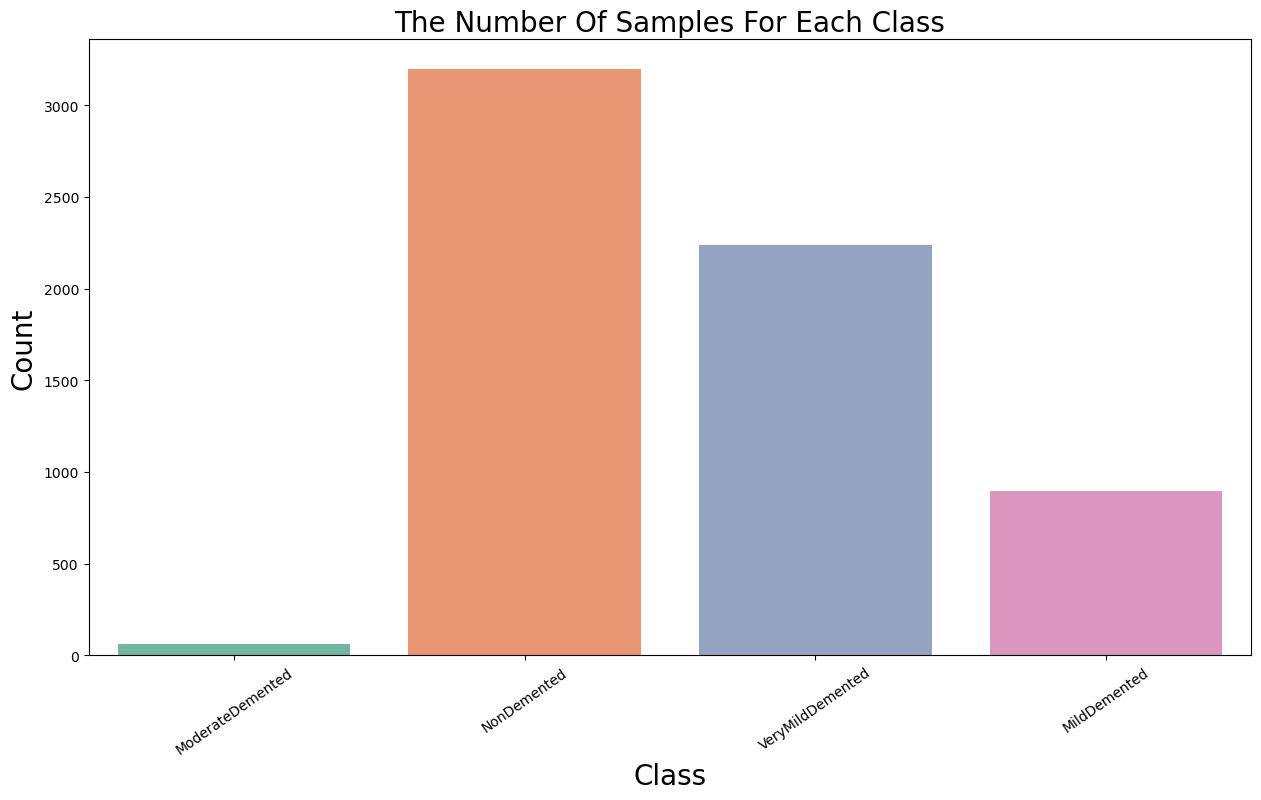

Found 6400 validated image filenames belonging to 4 classes.


/opt/conda/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


(6400, 176, 176, 3) (6400, 4)
oversampling
done
reshaping
(12800, 176, 176, 3) (12800, 4)
done


/tmp/ipykernel_52606/1181614751.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=labels,palette='Set2')


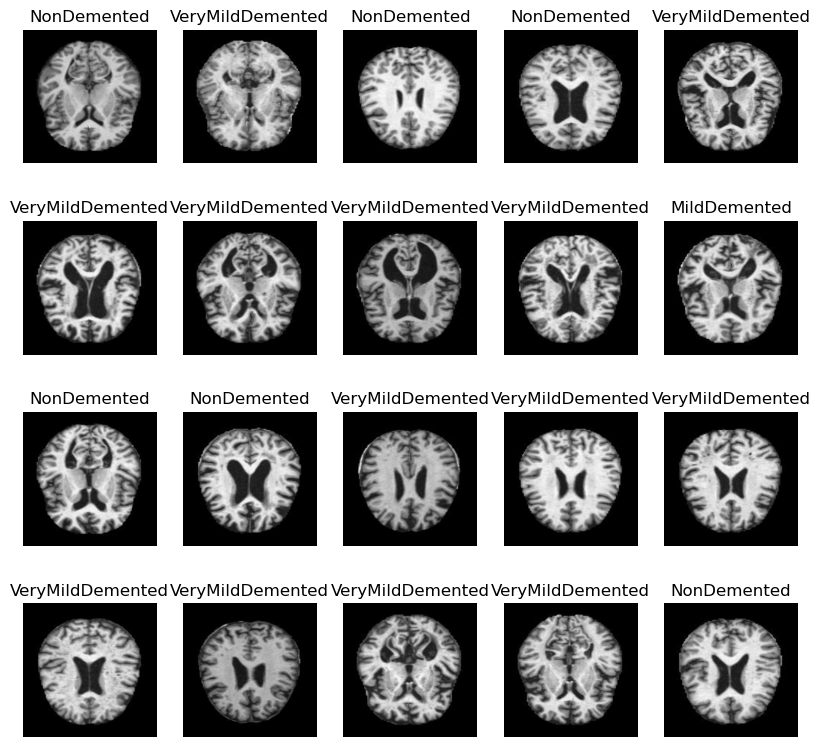

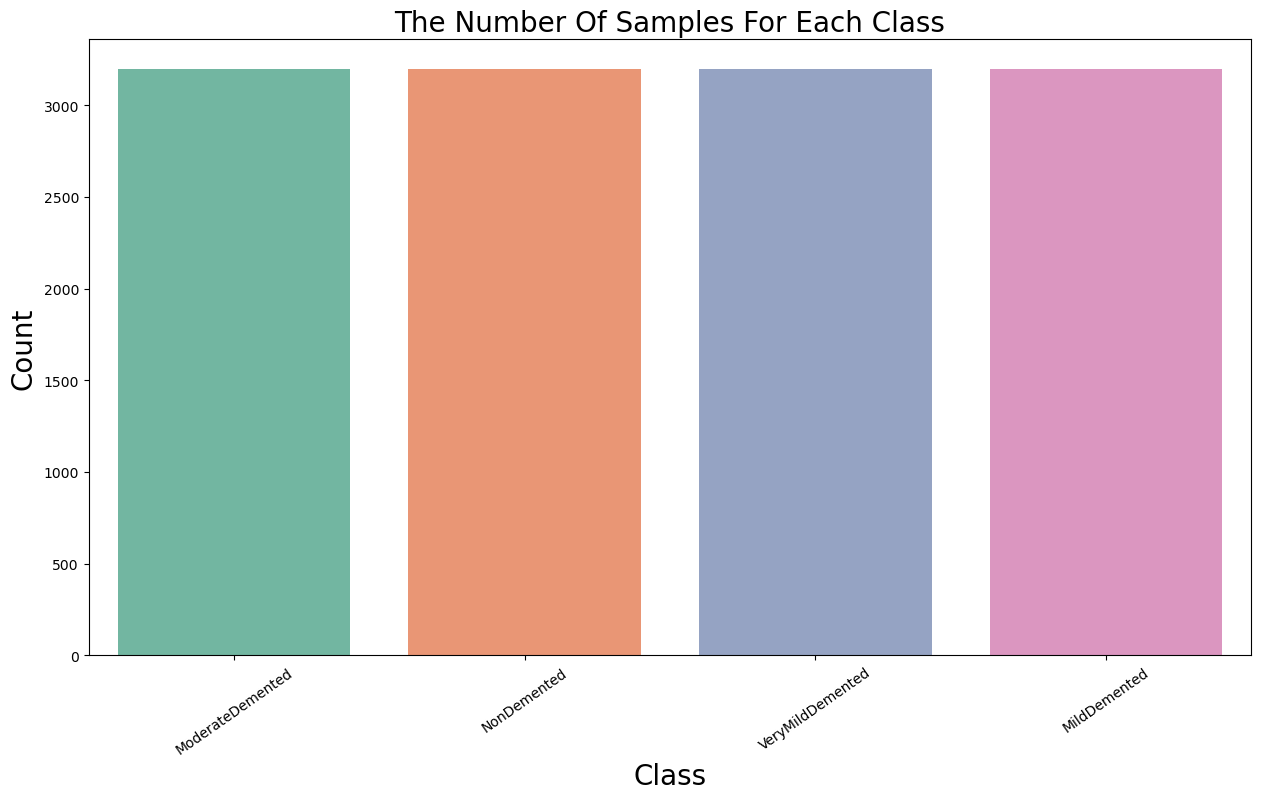

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import wandb


#physical_devices = tf.config.list_physical_devices('GPU')
#if physical_devices:
#    try:
#        # Prevent TensorFlow from consuming all memory on the GPU
#        tf.config.experimental.set_memory_growth(physical_devices[0], True)
#    except RuntimeError as e:
#        print(e)

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        # Prevent TensorFlow from consuming all memory on the GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print("RuntimeError in setting memory growth:", e)
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
import wandb
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Input, Activation

from tensorflow.keras.utils import to_categorical


from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

try:
    data_dir = "alzheimer"
    classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
    print(os.listdir(data_dir))
    images = []
    labels = []
    for subfolder in tqdm(os.listdir('alzheimer')):
        subfolder_path = os.path.join('alzheimer', subfolder)
        for folder in os.listdir(subfolder_path):
            subfolder_path2=os.path.join(subfolder_path,folder)
            for image_filename in os.listdir(subfolder_path2):
                image_path = os.path.join(subfolder_path2, image_filename)
                images.append(image_path)
                labels.append(folder)
    df = pd.DataFrame({'image': images, 'label': labels})
    df
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=df.label,palette='Set2')
    ax.set_xlabel("Class",fontsize=20)
    ax.set_ylabel("Count",fontsize=20)
    plt.title('The Number Of Samples For Each Class',fontsize=20)
    plt.grid(False)
    plt.xticks(rotation=35)
    plt.show()
    plt.figure(figsize=(10,12))
    for n,i in enumerate(np.random.randint(0,len(df),20)):
        plt.subplot(5,5,n+1)
        img=cv2.imread(df.image[i])
        img=cv2.resize(img,(224,224))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.title(df.label[i],fontsize=12)
    Size=(176,176)
    work_dr = ImageDataGenerator(
        rescale = 1./255,
    )
    train_data_gen = work_dr.flow_from_dataframe(df,x_col='image',y_col='label', target_size=Size, batch_size=6400, shuffle=False)
    train_data, train_labels = next(train_data_gen)
    print(train_data.shape, train_labels.shape)
    class_num=np.sort(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
    class_num
    import imblearn
    print("oversampling")
    smote = imblearn.over_sampling.SMOTE(random_state=42)
    train_data, train_labels = smote.fit_resample(train_data.reshape(-1, 176 * 176 * 3), train_labels)
    print("done")
    print("reshaping")
    
    train_data = train_data.reshape(-1, 176,176, 3)
    print(train_data.shape, train_labels.shape)
    print("done")
    
    labels=[class_num[i] for i in np.argmax(train_labels,axis=1) ]
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=labels,palette='Set2')
    ax.set_xlabel("Class",fontsize=20)
    ax.set_ylabel("Count",fontsize=20)
    plt.title('The Number Of Samples For Each Class',fontsize=20)
    plt.grid(False)
    plt.xticks(rotation=35)
    plt.show()
except Exception as e:
    print("Error occurred:", e)

In [ ]:
print("Data shapes:", train_data.shape, train_labels.shape)
from tensorflow.keras.utils import to_categorical

# Splitting the dataset into 70% training and 30% for further division into validation and test
X_train, X_temp, y_train, y_temp = train_test_split(
    train_data, train_labels, 
    test_size=0.3, 
    random_state=42, 
    shuffle=True, 
    stratify=train_labels
)

# Splitting the temporary dataset equally into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    shuffle=True, 
    stratify=y_temp
)



print("Training Set Size:", X_train.shape[0], "(", round(X_train.shape[0]/train_data.shape[0]*100, 2), "% )")
print("Validation Set Size:", X_val.shape[0], "(", round(X_val.shape[0]/train_data.shape[0]*100, 2), "% )")
print("Test Set Size:", X_test.shape[0], "(", round(X_test.shape[0]/train_data.shape[0]*100, 2), "% )")



# Initialize wandb
wandb.init(project="computer_vision", config={
    "learning_rate": 0.001,
    "architecture": "DenseNet121",
    "dataset": "alzheimer",
    "epochs": 30,
    "batch_size": 32,
    "input_shape":(176, 176, 3),  # InceptionV3 requires 299x299 input size
    "num_classes": 4
})

config = wandb.config



def create_densenet_model(config):


    try:

        print("creating DenseNet121")
        # Load the ResNet50 model with pre-trained ImageNet weights
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=config.input_shape)
        
        # Freezing the initial layers to maintain pre-trained features
        for layer in base_model.layers[:-10]:  # Freeze all except the last 25 layers
            layer.trainable = False
    
        # Model augmentation for specific task
        print("Loaded DenseNet121")

        x = base_model.output
        x = GlobalAveragePooling2D()(x)  # Reduce dimensions while maintaining spatial hierarchies
        
        # Fully connected layers for classification on new data
        x = Dense(128, use_bias=False)(x)  # Use bias=False with BatchNormalization
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Activation('relu')(x)
        
        x = Dense(32, use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    
        # Output layer
        predictions = Dense(config.num_classes, activation='softmax')(x)
        
        # Compile model
        model = Model(inputs=base_model.input, outputs=predictions)
        return model

    except Exception as e:
        print("Error occurred:", e)
        

# Initialize DenseNet model




model = create_densenet_model(config)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print('y_val shape is ' , y_val.shape)
# Log model summary to Wandb
class CustomWandbCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        wandb.log({
            'epoch': epoch,
            'loss': logs.get('loss'),
            'accuracy': logs.get('accuracy'),
            'val_loss': logs.get('val_loss'),
            'val_accuracy': logs.get('val_accuracy')
        })

# Customizing the Adam optimizer with specific beta_1, beta_2, and epsilon values
optimizer = Adam(
    learning_rate=config.learning_rate,  # Ensure 'config.learning_rate' is defined previously
)


print("compiling model")
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)
print("creating checkpoint instance")
final_checkpoint = 'final_best_model_Dense_net.keras'
final_checkpoint_callback = ModelCheckpoint(final_checkpoint, monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
# Start training the model


print("try to fit model")
print("Starting the training process...")
print('Training data shape:', X_train.shape, 'Training labels shape:', y_train_one_hot.shape)
print('Validation data shape:', X_val.shape, 'Validation labels shape:', y_val_one_hot.shape)


history = model.fit(
        X_train, y_train,
        epochs=config.epochs,
        batch_size=config.batch_size,
        validation_data=(X_val, y_val),
        callbacks=[final_checkpoint_callback, CustomWandbCallback()],
        verbose=1
    )
   

model.summary()



best_final_model = tf.keras.models.load_model(final_checkpoint)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Final Test loss: {test_loss}, Test accuracy: {test_accuracy}')

wandb.log({'final_test_loss': test_loss, 'final_test_accuracy': test_accuracy})

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


<Figure size 800x600 with 0 Axes>

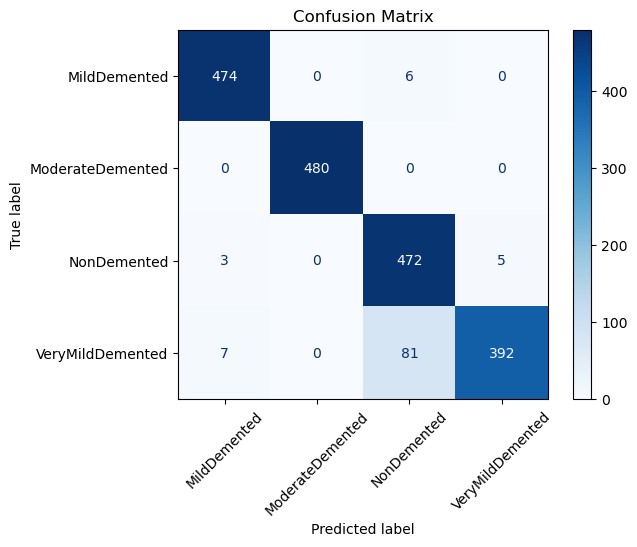

                  precision    recall  f1-score   support

    MildDemented       0.98      0.99      0.98       480
ModerateDemented       1.00      1.00      1.00       480
     NonDemented       0.84      0.98      0.91       480
VeryMildDemented       0.99      0.82      0.89       480

        accuracy                           0.95      1920
       macro avg       0.95      0.95      0.95      1920
    weighted avg       0.95      0.95      0.95      1920



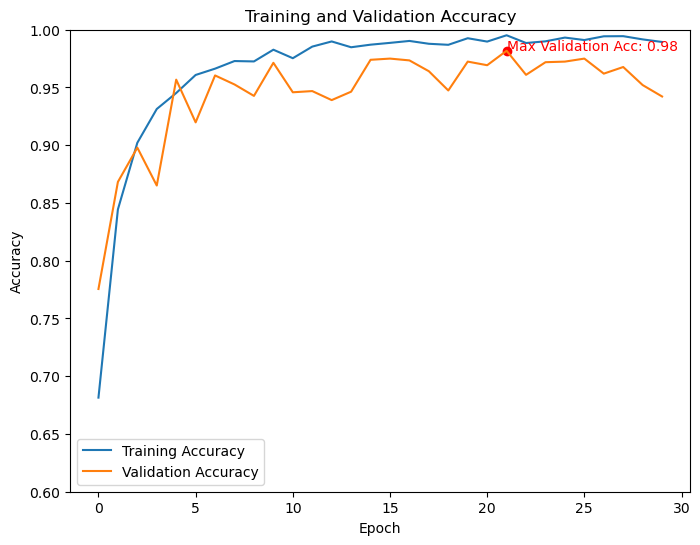

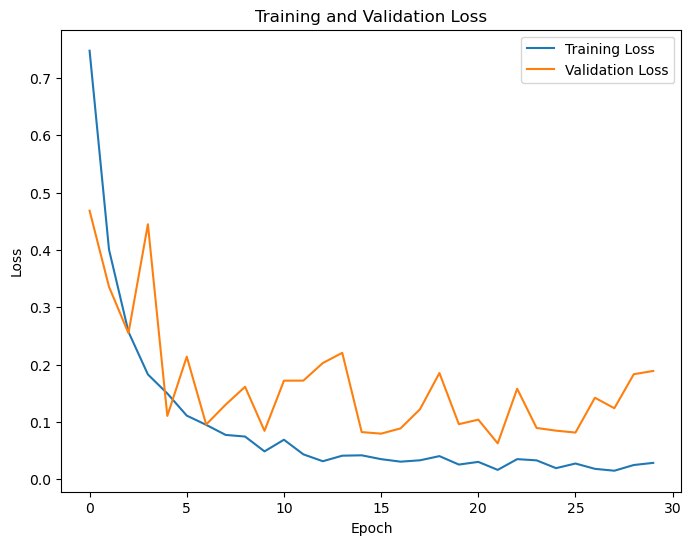

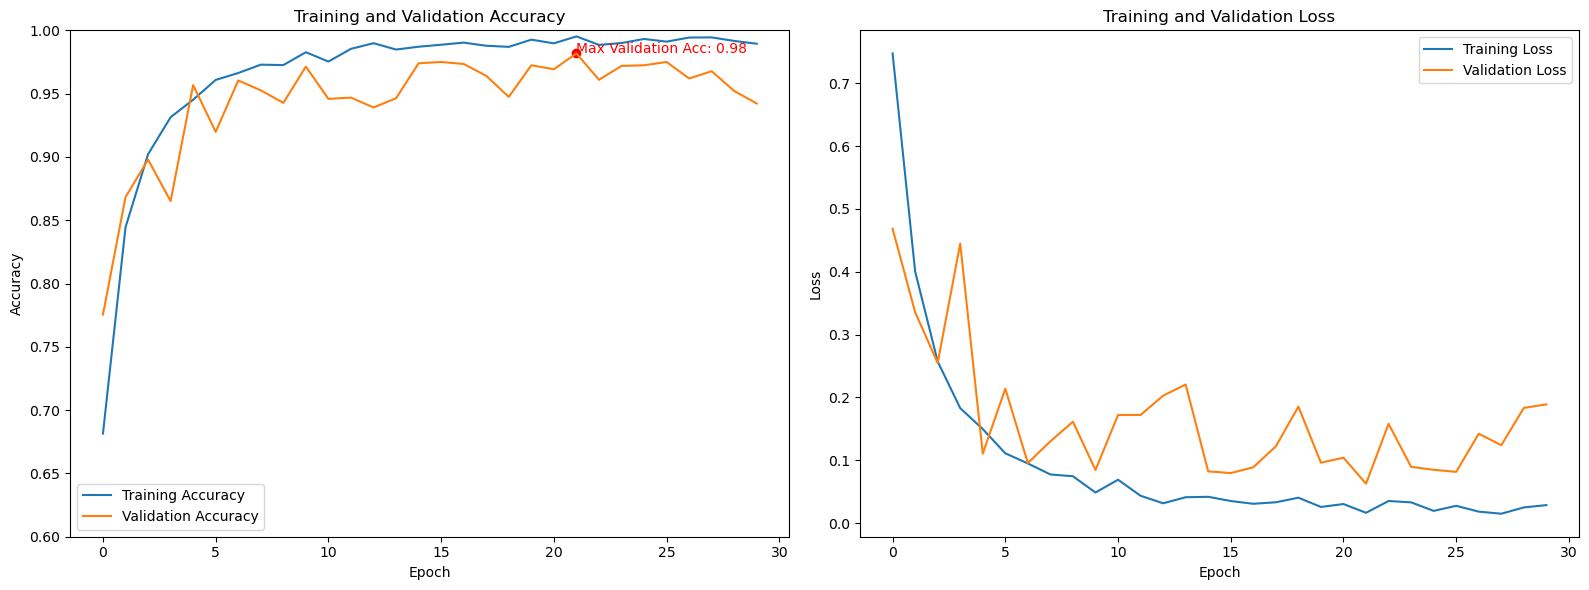

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Assuming your model's output is categorical, get the class with the highest probability
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class indices
y_test_classes = np.argmax(y_test, axis=1)
# Generate and plot the confusion matrix
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=classes))
# Plot training and validation accuracy

# Training and Validation Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# Highlight the maximum validation accuracy
max_val_acc = np.max(history.history['val_accuracy'])
max_val_epoch = np.argmax(history.history['val_accuracy'])
plt.scatter(max_val_epoch, max_val_acc, color='red')  # Mark the max point
plt.text(max_val_epoch, max_val_acc, f'Max Validation Acc: {max_val_acc:.2f}', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.6, 1])
plt.show()

# Training and Validation Loss Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Training and Validation Accuracy Plot on the first subplot
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
# Highlight the maximum validation accuracy
max_val_acc = np.max(history.history['val_accuracy'])
max_val_epoch = np.argmax(history.history['val_accuracy'])
ax1.scatter(max_val_epoch, max_val_acc, color='red')  # Mark the max point
ax1.text(max_val_epoch, max_val_acc, f'Max Validation Acc: {max_val_acc:.2f}', color='red')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_ylim([0.6, 1])

# Training and Validation Loss Plot on the second subplot
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Display the plots
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

Found 1287 images belonging to 4 classes.


/opt/conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step
Number of predictions: 1287
Number of true labels: 1287


<Figure size 1000x800 with 0 Axes>

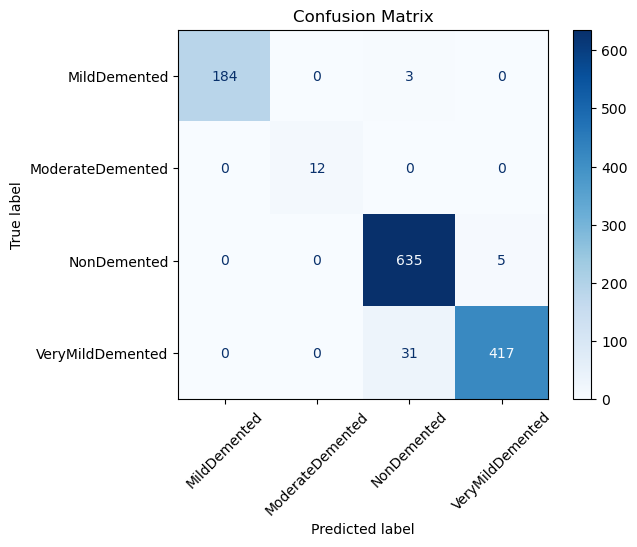

                  precision    recall  f1-score   support

    MildDemented       1.00      0.98      0.99       187
ModerateDemented       1.00      1.00      1.00        12
     NonDemented       0.95      0.99      0.97       640
VeryMildDemented       0.99      0.93      0.96       448

        accuracy                           0.97      1287
       macro avg       0.98      0.98      0.98      1287
    weighted avg       0.97      0.97      0.97      1287



In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import math

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'alzheimer/test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical',
    shuffle=False  # It's important not to shuffle for evaluation to match labels
)

# Calculate the number of steps needed to cover all samples in the test set exactly once
steps = math.ceil(test_generator.n / test_generator.batch_size)

# Resetting the generator to ensure the order of prediction
test_generator.reset()

# Use the calculated steps to predict
y_pred = model.predict(test_generator, steps=steps)
y_pred_classes = np.argmax(y_pred, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Ensure that the number of predictions and true labels match
print("Number of predictions:", len(y_pred_classes))
print("Number of true labels:", len(y_true))

# Generate and display the confusion matrix
classes = list(test_generator.class_indices.keys())  # Fetching class labels from the generator
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))


In [9]:
from PIL import Image, ImageDraw, ImageFont

# Load the images
image1 = Image.open('download (1).png')
image2 = Image.open('DenseNet_95_ConfusionMatrix.png')

# Resize images to the same height if necessary
image2 = image2.resize((image1.width, image1.height))

# Create a new image with a width that's the sum of the two images and the same height
total_width = image1.width + image2.width
max_height = max(image1.height, image2.height)
new_image = Image.new('RGB', (total_width, max_height))

# Paste the images into the new image to setup the background
new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))

# Create ImageDraw object
draw = ImageDraw.Draw(new_image)

# Specify the font and size for the labels (adjust the font path and size as needed)
# On many systems, you might need to specify a full path to a .ttf file
# If on Windows and no custom font is desired, you can use a default like 'arial.ttf'
font = ImageFont.load_default()  # This loads a default font, for custom fonts use ImageFont.truetype('path/to/font.ttf', size)

# Text to be added
text1 = "Inception"
text2 = "DenseNet"


# Positioning the text at the center top of each image
text_x1 = (image1.width- 200) // 2
text_x2 = image1.width + (image2.width - 200) // 2
text_y = 10  # A small padding from the top

# Set the text color
text_color = (0, 0, 0)  # White

# Adding text on image1
draw.text((text_x1, text_y), text1, font=font, fill=text_color)
# Adding text on image2
draw.text((text_x2, text_y), text2, font=font, fill=text_color)

# Save the new image
new_image.save('DenseNetVSInception.png')

new_image.show()


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmp7roxa7ns.PNG'
